In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv(r'data/2315676.txt', na_values=-9999, delim_whitespace=True, usecols=['DATE','TAVG','TMAX','TMIN'],skiprows=[1])
print(data.head(10))
"""import padas, numpy, matplotlib for doing excersise, change -9999 to NaN, and reading only usefull columns( date, tavg, tmax, tmin), also skip the fow with
---- indix =1 
i always print head of data to check if it seems right"""

       DATE  TAVG  TMAX  TMIN
0  19080101   NaN   2.0 -37.0
1  19080102   NaN   6.0 -26.0
2  19080103   NaN   7.0 -27.0
3  19080104   NaN  -3.0 -27.0
4  19080105   NaN   4.0 -36.0
5  19080106   NaN   7.0  -1.0
6  19080107   NaN   8.0  -3.0
7  19080108   NaN   3.0  -9.0
8  19080109   NaN   1.0 -25.0
9  19080110   NaN -10.0 -32.0


'import padas, numpy, matplotlib for doing excersise, change -9999 to NaN, and reading only usefull columns( date, tavg, tmax, tmin), also skip the fow with\n---- indix =1 \ni always print head of data to check if it seems right'

In [27]:
data['average'] = data[['TMAX','TMIN']].mean(axis=1)
data['TAVG'].fillna(data['average'], inplace=True)
print(data.head(10)) 
""" because there are so many value NaN in column, TVAG, i created a new column for temperature average named average.
replace NaN values in TAVG by value in average column"""

       DATE  TAVG  TMAX  TMIN  average
0  19080101 -17.5   2.0 -37.0    -17.5
1  19080102 -10.0   6.0 -26.0    -10.0
2  19080103 -10.0   7.0 -27.0    -10.0
3  19080104 -15.0  -3.0 -27.0    -15.0
4  19080105 -16.0   4.0 -36.0    -16.0
5  19080106   3.0   7.0  -1.0      3.0
6  19080107   2.5   8.0  -3.0      2.5
7  19080108  -3.0   3.0  -9.0     -3.0
8  19080109 -12.0   1.0 -25.0    -12.0
9  19080110 -21.0 -10.0 -32.0    -21.0


' because there are so many value NaN in column, TVAG, i created a new column for temperature average named average.\nreplace NaN values in TAVG by value in average column'

In [28]:
def convert_to_c(fer:float):
    return (fer - 32)/1.8
""" def a function that convers F to C by formular c = (F-32)/1.8"""
    

' def a function that convers F to C by formular c = (F-32)/1.8'

In [29]:
data['TAVG_C'] = data['TAVG'].apply(convert_to_c)
""" using function convert to c to convert avage to c as column TAVG_C"""

print(data.head(10))
print(len(data))

       DATE  TAVG  TMAX  TMIN  average     TAVG_C
0  19080101 -17.5   2.0 -37.0    -17.5 -27.500000
1  19080102 -10.0   6.0 -26.0    -10.0 -23.333333
2  19080103 -10.0   7.0 -27.0    -10.0 -23.333333
3  19080104 -15.0  -3.0 -27.0    -15.0 -26.111111
4  19080105 -16.0   4.0 -36.0    -16.0 -26.666667
5  19080106   3.0   7.0  -1.0      3.0 -16.111111
6  19080107   2.5   8.0  -3.0      2.5 -16.388889
7  19080108  -3.0   3.0  -9.0     -3.0 -19.444444
8  19080109 -12.0   1.0 -25.0    -12.0 -24.444444
9  19080110 -21.0 -10.0 -32.0    -21.0 -29.444444
41065


In [30]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data['year'] = data['DATE'].dt.year
data['month'] = data['DATE'].dt.month
print(data.tail(10))

""" i used the function to_datetime to convert the column DATE to date time data, i also using the function dt.year to have new column year 
from column DATE, and function dt.month to have new column month from column DATE"""

            DATE  TAVG  TMAX  TMIN  average     TAVG_C  year  month
41055 2020-09-28  47.0  52.0  42.0     47.0   8.333333  2020      9
41056 2020-09-29  49.0  58.0   NaN     58.0   9.444444  2020      9
41057 2020-09-30  48.0  55.0  38.0     46.5   8.888889  2020      9
41058 2020-10-01  51.0  53.0   NaN     53.0  10.555556  2020     10
41059 2020-10-02  50.0  53.0  47.0     50.0  10.000000  2020     10
41060 2020-10-03  47.0  51.0   NaN     51.0   8.333333  2020     10
41061 2020-10-04  43.0  47.0  37.0     42.0   6.111111  2020     10
41062 2020-10-05  42.0   NaN  37.0     37.0   5.555556  2020     10
41063 2020-10-06  45.0  46.0  43.0     44.5   7.222222  2020     10
41064 2020-10-07  47.0  50.0  44.0     47.0   8.333333  2020     10


' i used the function to_datetime to convert the column DATE to date time data, i also using the function dt.year to have new column year \nfrom column DATE, and function dt.month to have new column month from column DATE'

In [31]:
def seasons(month: int):
    if month <=2 or month == 12:
        return 'Winter'
    elif month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
""" i built the function season to classify season accoring the month"""  

' i built the function season to classify season accoring the month'

In [32]:
data['season'] = data['month'].apply(seasons)
""" i created the new column season which using the function seasons for column month"""
print(data.head(10))

        DATE  TAVG  TMAX  TMIN  average     TAVG_C  year  month  season
0 1908-01-01 -17.5   2.0 -37.0    -17.5 -27.500000  1908      1  Winter
1 1908-01-02 -10.0   6.0 -26.0    -10.0 -23.333333  1908      1  Winter
2 1908-01-03 -10.0   7.0 -27.0    -10.0 -23.333333  1908      1  Winter
3 1908-01-04 -15.0  -3.0 -27.0    -15.0 -26.111111  1908      1  Winter
4 1908-01-05 -16.0   4.0 -36.0    -16.0 -26.666667  1908      1  Winter
5 1908-01-06   3.0   7.0  -1.0      3.0 -16.111111  1908      1  Winter
6 1908-01-07   2.5   8.0  -3.0      2.5 -16.388889  1908      1  Winter
7 1908-01-08  -3.0   3.0  -9.0     -3.0 -19.444444  1908      1  Winter
8 1908-01-09 -12.0   1.0 -25.0    -12.0 -24.444444  1908      1  Winter
9 1908-01-10 -21.0 -10.0 -32.0    -21.0 -29.444444  1908      1  Winter


In [33]:

mean_seasons= data.groupby(['year', 'season'])['TAVG_C'].mean().reset_index()
""" i created a new data frame mean_seasons to calculate a mean of all seasons in everyyear, and also used the function reset_index() to reset the index of new dataframe"""

print(mean_seasons.head(10))


   year  season     TAVG_C
0  1908  Autumn  -1.895604
1  1908  Spring  -2.267512
2  1908  Summer  11.515700
3  1908  Winter -11.978022
4  1909  Autumn  -1.422466
5  1909  Spring  -5.682367
6  1909  Summer  11.814614
7  1909  Winter -11.354938
8  1910  Autumn  -2.157407
9  1910  Spring  -1.407407


In [34]:
mean_seasons_1951_1980 = mean_seasons.loc[(mean_seasons['year'] >= 1951) & (mean_seasons['year'] <= 1980)].reset_index()
""" i created a new data frame from dataframe mean_seasons that has only data from year 1951 to 1980, and seret the index"""
del mean_seasons_1951_1980['index']
""" i delete the column index that is from the dataframe mean_seasons because i don't need it"
print(mean_seasons_1951_1980.head(10))"""
print(len(mean_seasons))

452


In [35]:
avg_seasons = mean_seasons_1951_1980 = data.groupby(['season'])['TAVG_C'].mean().reset_index()
""" i created the new data frame avg_seasons to calculate the  the arage temperature from 1951 to 1980"""
print(avg_seasons.head(10))

   season     TAVG_C
0  Autumn  -0.466446
1  Spring  -2.001760
2  Summer  12.460925
3  Winter -12.880182


In [36]:
mean_seasons['anomaly'] = 0.0
for i in range(0, 452):
    if mean_seasons.at[i, 'season'] == 'Autumn':        
        mean_seasons.at[i,'anomaly'] = (mean_seasons.at[i,'TAVG_C'] - avg_seasons.at[0,'TAVG_C'])
        
    if mean_seasons.at[i, 'season'] == 'Spring':        
        mean_seasons.at[i,'anomaly'] = (mean_seasons.at[i,'TAVG_C'] - avg_seasons.at[1,'TAVG_C'])
        
    if mean_seasons.at[i, 'season'] == 'Summer':        
        mean_seasons.at[i,'anomaly'] = (mean_seasons.at[i,'TAVG_C'] - avg_seasons.at[2,'TAVG_C'])
        
    if mean_seasons.at[i, 'season'] == 'Winter':        
        mean_seasons.at[i,'anomaly'] = (mean_seasons.at[i,'TAVG_C'] - avg_seasons.at[3,'TAVG_C'])
""" i created the new column 'anomaly' to calculate the anamalies eat year, using also the for loop to calculate it
"""
print(mean_seasons.head(10))

   year  season     TAVG_C   anomaly
0  1908  Autumn  -1.895604 -1.429159
1  1908  Spring  -2.267512 -0.265752
2  1908  Summer  11.515700 -0.945224
3  1908  Winter -11.978022  0.902160
4  1909  Autumn  -1.422466 -0.956021
5  1909  Spring  -5.682367 -3.680607
6  1909  Summer  11.814614 -0.646311
7  1909  Winter -11.354938  1.525243
8  1910  Autumn  -2.157407 -1.690962
9  1910  Spring  -1.407407  0.594353


In [37]:
winter = mean_seasons.loc[mean_seasons['season']=='Winter']
winter = winter[['year','anomaly']]

summer = mean_seasons.loc[mean_seasons['season']=='Summer']
summer = summer[['year','anomaly']]

spring = mean_seasons.loc[mean_seasons['season']=='Spring']
spring = spring[['year','anomaly']]

autumn = mean_seasons.loc[mean_seasons['season']=='Autumn']
autumn = autumn[['year','anomaly']]
""" i created the new dataframes: winter, summer, spring, and autumn' that contain onlys colukmn season and  anomaly column"""

" i created the new dataframes: winter, summer, spring, and autumn' that contain onlys colukmn season and  anomaly column"

' save the figure as the name im done'

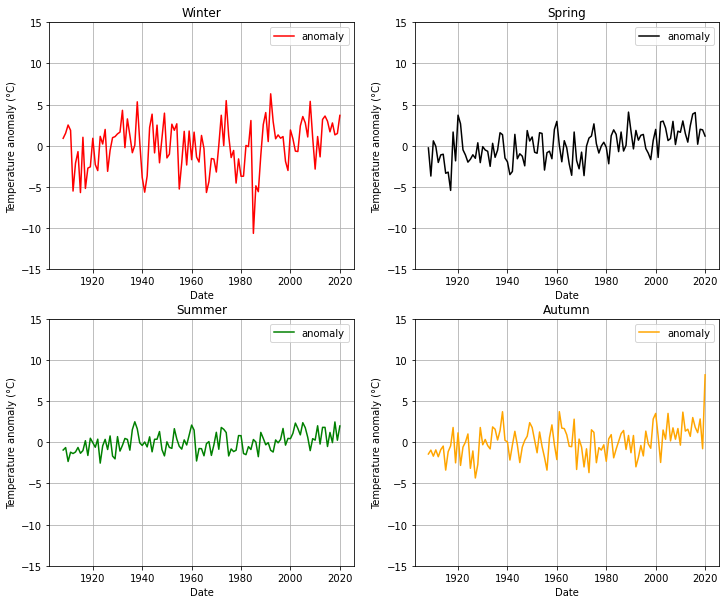

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10));
ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]
""" how to locate 4 figures in one picture"""
winter.plot(ax =ax1,kind='line',x='year',y='anomaly', color='red', xlabel = 'Date', ylabel = 'Temperature anomaly (°C)', grid = True, title = 'Winter', yticks=(-15,-10,-5,0, 5,10,15,))
""" used keyword yticks to customize the range of temperature anomany column"""
summer.plot(ax = ax3,kind='line',x='year',y='anomaly', color='green',xlabel = 'Date', ylabel = 'Temperature anomaly (°C)', grid = True, title = 'Summer',  yticks=(-15,-10,-5,0, 5,10,15,))
spring.plot(ax = ax2, kind='line',x='year',y='anomaly', color='black', xlabel = 'Date', ylabel = 'Temperature anomaly (°C)', grid = True, title = 'Spring', yticks=(-15,-10,-5,0, 5,10,15,))
autumn.plot(ax = ax4, kind='line',x='year',y='anomaly', color='orange', xlabel = 'Date', ylabel = 'Temperature anomaly (°C)', grid = True, title = 'Autumn', yticks=(-15,-10,-5,0, 5,10,15,))
plt.savefig('im_done.png')
""" save the figure as the name im done"""